# Going Further

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

Simon Shaw
<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## What this is about...

... Some of the things we could have covered but didn't, and a review.

- Some more Deep Learning

- Cross-Entropy and SoftMax

- A review of topics

- High Dimensional Volume and Distance

- The *curse of dimensionality*

- Privacy, Ethics, explainability

- Software choices, careers

Our emphasis throughout has been on *doing* rather than *proving*:
*just enough: progress at pace*

This is an opportunity to think about some of the bigger contextual issues.

### Assigned Reading

For this material you are recommended Chapter 1.5 of [UDL] 
and Chapter 12 of [MLFCES].

- UDL: Understanding Deep Learning, by Simon J.D. Prince. PDF draft available here:
  <https://udlbook.github.io/udlbook/>
- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm,
  Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. 
  <http://smlbook.org>.
- IML: Interpretable Machine Learning: A Guide for Making Black Box Models Explainable,
  by Christoph Molnar. <https://christophm.github.io/interpretable-ml-book/>.

These can be accessed legally and without cost.


### The Tensorflow Playground

Tensorflow is a widely used deep learning library. 

This web page <http://playground.tensorflow.org> allows you to configure your
own neural net.

You can play with the hyperparameters, and see the effect for various 
classification problems.

PyTorch is similarly widely used. There are also other software libraries but
these are ones we seem (at the moment at least) to hear most about.

### Entropy

We used the TSE cost when we created our MNIST neural net classifier. An
often used alternative - which is sometimes claimed as superior for 
classification problems - is the **cross entropy** cost.

Let $X$ be a discrete random variable taking values $X_1,\ X_2,\ldots$, with 
corresponding probabilities $p_1 = P(X=X_1),\ p_2 = P(X=X_2),\ldots$.

We define the **entropy** of $X$ as

$$
H(X)
= -\sum_{k=1,2,\ldots} P(X = X_k) \log_a(P(X = X_k))
= -\sum_{k=1,2,\ldots} p_k \log_a(p_k)
$$

for a logarithmic base $a$. When $a=2$ we often write $\lg(z) = \log_2(x)$ and 
measure entropy in *bits*. When $a=e$ we have, of course,
$\ln(z) = \log_e(z)$, and entropy is then measured in *nats*.

Entropy is a measure of the amount of **uncertainty** or **surprise** contained 
in the random variable. The larger the entropy, the more uncertainty there is. 

Consider a fair coin toss where $X \in \{H,T\}$ with $p_1, p_2 = 1/2$.
Then, in bits (don't get your $H$'s confused),

$$
H(X)
= -\sum_{k=1,2,\ldots} p_k \log_2(p_k)
= -\sum_{k=1,2} \frac{1}{2} \log_2\left(\frac{1}{2}\right)
= 2\times \frac{1}{2} \log_2(2) = 1.
$$

Next, consider a biased coin such that $X=H$ with unit probability.
The entropy now is

$$
H(X)
= -\sum_{k=1,2,\ldots} p_k \log_2(p_k)
= -1\times\log_2(1) + \lim_{t\downarrow 0} t\log_2(t) = 0 + 0
$$

because $t\log_2(t)\to 0$ as $t\downarrow 0$. Uncertainty is maximal in the
first case, but in the second there is only certainty.

### Information

The background to this concept is that as $-\log_a(P(X)) = \log_a(1/P(X))$
decreases as $P(X)$ increases it can be used to measure the amount of **information**
or (perhaps more intuitively) **surprise** in observing the event $X$.

If $X$ has very low probability then we're very surprised when it happens and the
information, or surprisal, in that observation is high:
$\log_a(1/P(X))\to\infty$ as $P(X)\downarrow 0$.

On the other hand, if $P(X)=1$ then $\log_a(1/P(X))=0$ and there is no (new)
information or surprise when $X$ happens.

So, writing information as $I(X) =-\log_a(P(X))$, we see that the entropy is no more
than the expected value, or average, of $I(X)$ under the given probability distribution.

### Cross Entropy

Let the vectors $\boldsymbol{t} = (t_1, t_2, \ldots, t_N)^T$ and
$\boldsymbol{y} = (y_1, y_2, \ldots, y_N)^T$ each represent discrete probability 
mass functions (i.e. each component in $[0,1]$, they sum to $1$) 
**for the same event**.

This may seem strange - how can an event have two
different probabilities? For us, the idea here is that $\boldsymbol{t}$
represents some kind of **ground truth** for the event, while
$\boldsymbol{y}$ is an approximation to $\boldsymbol{t}$. 

As a specific example we could have $\boldsymbol{t} = (0.2, 0.1, 0.6, 0.1)^T$
and $\boldsymbol{y} = (0.1, 0.05, 0.65, 0.2)^T$. 

The expected value of the information contained in $\boldsymbol{y}$ taken
relative to the probability distribution of $\boldsymbol{t}$ is called
the **cross entropy** ($\boldsymbol{y}$ relative to $\boldsymbol{t}$).
It is given by

$$
\mathscr{F}(\boldsymbol{t},\boldsymbol{y})
= - \sum_{j=1,2,\ldots} t_j \log_a(y_j).
$$

Alternatively, we might have $\boldsymbol{t} = (0, 0, 1, 0)^T$ and
$\boldsymbol{y} = (0.1, 0.05, 0.65, 0.2)^T$ as a different example.

Why and how might this happen? Well, we've seen this where $\boldsymbol{t}$
represents a one-hot encoding of the training/test labels and $\boldsymbol{y}$
is a neural net's output approximation to $\boldsymbol{t}$.

If we interpret the outputs as probabilities then we can end up with the
situation just described, where the network attempts to approximate
$\boldsymbol{t}$ with $\boldsymbol{y}$. Then

$$
\mathscr{F}(\boldsymbol{t},\boldsymbol{y})
= - \sum_{j=1,2,\ldots} t_j \log_a(y_j)
= - \log_a(y_3).
$$

(because $t_3=1$ and $t_k=0$ if $k\ne 3$ (in code indices start at zero).
This tends to zero **from above** as $y_3\uparrow t_3 = 1$ and gives us
a new way to ascribe an **error** or **loss/cost** to the network.                  

### Outputs as Probabilities

The difficulty with what we have just discovered though is that we
interpreted $\boldsymbol{y} = (0.1, 0.05, 0.65, 0.2)^T$ as a probability
mass function.

In fact we have so safeguards in place in our neural net to make sure that
this is justified. The sigmoid function forces each element of 
$\boldsymbol{y}$ to be within the interval $(0,1)$ but doesn't force the values to
sum to one. For example, 

$$
\boldsymbol{y} = (0.1, 0.05, 0.65, 0.2)^T
\qquad\text{ and }\qquad
\boldsymbol{y} = (0.13, 0.25, 0.75, 0.31)^T
$$

are - at least in principle - equally possible. The second doesn't sum to one.

We get around this by swapping **sigmoid** for **softmax**.

### Softmax

Let $\boldsymbol{x}\in\mathbb{R}^n$ be an arbitrary vector. The **softmax function**,
written $\mathrm{SoftMax}\colon\mathbb{R}^n\to\mathbb{R}^n$ is defined by

$$
\mathrm{SoftMax}(\boldsymbol{x}) := 
\frac{1}{\displaystyle\sum_{i=1}^n e^{x_i}}
\left(
\begin{array}{c}
e^{x_1} \\ e^{x_2} \\ \vdots \\ e^{x_n}
\end{array}
\right).
$$

In other words, the $j$-th component of the $n$-vector
$\mathrm{SoftMax}(\boldsymbol{x})$ is given by

$$
\big(\mathrm{SoftMax}(\boldsymbol{x})\big)_j := 
\frac{e^{x_j}}{e^{x_1}+e^{x_2}+\cdots+e^{x_n}}.
$$

This function can be used on an output vector to create a probability mass function.
Each component is within $(0,1)$ and they sum to one.


### Further Calculus for Learning

To use these concepts and replace TSE cost with XE (cross entropy) cost
we use $\mathrm{SoftMax}$ as a final layer activation function, and
for ground truth and outputs
$\boldsymbol{t}_k, \boldsymbol{y}_k\in\mathbb{R}^d$, 
we define the cost as

$$
\mathcal{E}(\boldsymbol{W}_1,\boldsymbol{W}_2,\boldsymbol{W}_3,
\boldsymbol{b}_1,\boldsymbol{b}_2,\boldsymbol{b}_3)
= \sum_{k=1}^{N_{\mathrm{train}}} 
\mathscr{F}(\boldsymbol{t}_k,\boldsymbol{y}_k)
$$
 
$$
\text{for the loss}\quad
\mathscr{F}_k := \mathscr{F}(\boldsymbol{t}_k,\boldsymbol{y}_k) :=
-\sum_{j=1}^d t_{kj}\ln(y_{kj})
\quad\text{instead of (TSE)}\quad
\mathscr{F}_k = \Vert\boldsymbol{t}_k-\boldsymbol{y}_k\Vert_2^2.
$$

And, as before, we just write $\mathcal{E}$ for brevity.


The backprop calculus we went over before still applies here except that instad 
of $\boldsymbol{S} = -2\boldsymbol{A}\boldsymbol{e}$ at the final layer we
would need to calculate 

$$
\boldsymbol{S} = \frac{\partial\mathscr{F}}{\partial \boldsymbol{n}}
\quad\text{with}\quad
\boldsymbol{n} = \boldsymbol{W}^T\hat{\boldsymbol{a}}+\boldsymbol{b}.
$$


Note that we have dropped the subscript $k$ for clarity, and then 
component $c$ of this is

$$
S_c = -\frac{\partial}{\partial n_c}
\sum_{j=1}^d t_{j}\ln(y_{j})
=
-\sum_{j=1}^d \frac{t_{j}}{y_{j}}
\frac{\partial y_{j}}{\partial n_c}
\quad\text{with}\quad
n_c = \sum_r W_{rc}\hat{a}_r+b_c
$$

and $\boldsymbol{y}=\sigma(\boldsymbol{n})$ with $\sigma$ 
being $\mathrm{SoftMax}$.



Now, using $\boldsymbol{y}=\sigma(\boldsymbol{n})$ with $\sigma$ 
being $\mathrm{SoftMax}$, we calculate,

\begin{align*}
\frac{\partial y_{j}}{\partial n_c}
& = \frac{\partial}{\partial n_c}
\frac{e^{n_j}}{e^{n_1}+e^{n_2}+\cdots+e^{n_d}}  =
\frac{\left(\sum_k e^{n_k}\right)\left(\frac{\partial}{\partial n_c} e^{n_j}\right) - e^{n_j}e^{n_c}}{\left(\sum_k e^{n_k}\right)^2}
\\
& = \left\{\begin{array}{ll}
\frac{e^{n_c}}{\left(\sum_k e^{n_k}\right)}
-\left(
\frac{e^{n_c}}{\sum_k e^{n_k}}
\right)^2
&\text{if }j = c;
\\
-\frac{e^{n_j}}{\sum_k e^{n_k}}\times
\frac{e^{n_c}}{\sum_k e^{n_k}}
&\text{if }j \ne c,
\end{array}\right.
\\
& = \left\{\begin{array}{ll}
\sigma(n_c)\big(1-\sigma(n_c)\big).
&\text{if }j = c;
\\
-\sigma(n_c)\sigma(n_j).
&\text{if }j \ne c,
\end{array}\right.
\\
& = \left\{\begin{array}{ll}
y_c\big(1-y_c\big)
&\text{if }j = c;
\\
-y_c y_j
&\text{if }j \ne c.
\end{array}\right.
\end{align*}

Therefore

$$
S_c = -\sum_{j=1}^d \frac{t_{j}}{y_{j}}
\frac{\partial y_{j}}{\partial n_c}
= -\sum_{j=1}^d \frac{t_{j}}{y_{j}}\left\{\begin{array}{ll}
y_c\big(1-y_c\big)
&\text{if }j = c;
\\
-y_c y_j
&\text{if }j \ne c,
\end{array}\right.
$$

which simplifies to,

$$
S_c = 
-\frac{t_c}{y_c}\times y_c\big(1-y_c\big)
-\sum_{j=1\atop j\ne c}^d \frac{t_{j}}{y_{j}}\big(-y_c y_j\big)
=
t_c(y_c-1)
+y_c\sum_{j=1\atop j\ne c}^d t_j.
$$

One more push and we get,

$$
S_c = 
-t_c
+y_c\sum_{j=1}^d t_j = -(-t_c-y_c) = -e_c
$$

for $\boldsymbol{e}=\boldsymbol{t}-\boldsymbol{y}$ and because 
$\boldsymbol{t}$ is **one hot**.

In summary, to use **cross entropy** cost we put 
$\boldsymbol{S} = -\boldsymbol{e}$ at the final layer and use
$\mathrm{SoftMax}$ as the final layer activation function.

The **SAWS** algortihm is then applied just as before to 
backprop:

$$
\boldsymbol{S}_{i-1}
=\boldsymbol{A}_{i-1}\boldsymbol{W}_i\boldsymbol{S}_i.
$$

We'll leave the implementation as a homework - here's the big picture.

### The Forward and Backward Propagation ('backprop') Algorithm - Learning from Data

\begin{align*}
\begin{array}{rl}
\text{forward} &\text{prop} 
\\\ \\
\boldsymbol{a}_0 & = \boldsymbol{x},
\\
\boldsymbol{n}_1 & = \boldsymbol{W}_1^T\boldsymbol{a}_0+\boldsymbol{b}_1,
\\
\boldsymbol{a}_1 & = \sigma_1(\boldsymbol{n}_1),
\\
\boldsymbol{n}_2 & = \boldsymbol{W}_2^T\boldsymbol{a}_1+\boldsymbol{b}_2,
\\
\boldsymbol{a}_2 & = \sigma_2(\boldsymbol{n}_2),
\\
\boldsymbol{n}_3 & = \boldsymbol{W}_3^T\boldsymbol{a}_2+\boldsymbol{b}_3,
\\
\boldsymbol{a}_3 & = \sigma_\mathrm{SoftMax}(\boldsymbol{n}_3),
\\
\boldsymbol{y} & = \boldsymbol{a}_3.
\end{array}
\qquad &\qquad
\begin{array}{rl}
\text{back} &\text{prop with XE}
\\\ \\
\boldsymbol{e}_k & = \boldsymbol{t}_k-\boldsymbol{y}_k,
\\
\boldsymbol{S}_3 & = -\boldsymbol{e}_k,
\\
\boldsymbol{W}_3 & \leftarrow \boldsymbol{W}_3
- \alpha \boldsymbol{a}_2 \boldsymbol{S}_3^T
\text{ and }
\boldsymbol{b}_3 \leftarrow \boldsymbol{b}_3
- \alpha \boldsymbol{S}_3
\\
\boldsymbol{S}_2 & = \boldsymbol{A}_2\boldsymbol{W}_3\boldsymbol{S}_3
\\
\boldsymbol{W}_2 & \leftarrow \boldsymbol{W}_2
- \alpha \boldsymbol{a}_1 \boldsymbol{S}_2^T
\text{ and }
\boldsymbol{b}_2 \leftarrow \boldsymbol{b}_2
- \alpha \boldsymbol{S}_2
\\
\boldsymbol{S}_1 & = \boldsymbol{A}_1\boldsymbol{W}_2\boldsymbol{S}_2
\\
\boldsymbol{W}_1 & \leftarrow \boldsymbol{W}_1
- \alpha \boldsymbol{a}_0 \boldsymbol{S}_1^T
\text{ and }
\boldsymbol{b}_1 \leftarrow \boldsymbol{b}_1
- \alpha \boldsymbol{S}_1
\end{array}
\end{align*}


### High Dimensional Volume

We have seen many examples of data represented as vectors in high dimensional
space. The most extreme example we worked with were the MNIST digits, each of
which was represented as a vector of $28^2$ pixel values.

It is interesting to contemplate how high dimensional space behaves. It is
a bit counter intuitive.

Consider a hypercube with unit side lengths and consider what happens when 
we form cartesian prodcuts of the unit interval $[0,1]$ to reach higher and
higher dimensions.

For example, $[0,1]^1=[0,1]$ is a line segment, $[0,1]^2=[0,1]\times [0,1]$
is a square, $[0,1]^3=[0,1]\times [0,1]\times [0,1]$ a cube.

Continuing, $[0,1]^d=[0,1]\times[0,1]\times\cdots\times[0,1]$ ($d$-times) is
a hypercube in $\mathbb{R}^d$.


The volume of a hypercube is just the $d$-th power of its side length:
$d^2$ for a square, for example.

Consider a hypercube, $C_1$, with unit side length, $1$, and a
shrunk hypercube, $C_2$, with side length $1-\epsilon$,
for some small $\epsilon > 0$.

Look at the volume ratio:
 
$$
\frac{\mathrm{Volume}(C_2)}{\mathrm{Volume}(C_1)}
= 
\frac{(1-\epsilon)^d}{1^d}
= 
\left(1-\frac{\epsilon d}{d}\right)^d \to \exp(-\epsilon d)
\quad\text{as}\quad d\to\infty.
$$

If you're wondering about that limit, recall the binomial expansion,

\begin{align*}
\left(1+\frac{x}{n}\right)^n 
& = 1 + x + \frac{n(n-1)}{2!}\left(\frac{x}{n}\right)^2
+ \frac{n(n-1)(n-2)}{3!}\left(\frac{x}{n}\right)^3 + \cdots,
\\
& = 1 + x + \frac{n(n-1)}{n^2}\frac{x^2}{2!}
+ \frac{n(n-1)(n-2)}{n^3}\frac{x^3}{3!} + \cdots,
\\
& = 1 + x + \left(1-\frac{1}{n}\right)\frac{x^2}{2!}
+ \left(1-\frac{1}{n}\right)\left(1-\frac{2}{n}\right)\frac{x^3}{3!} + \cdots,
\\
\\
& \to 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots,
\\
& = e^x\quad\text{ as }n\to\infty.
\end{align*}


Let's plot the volume ratio $\exp(-\epsilon d)$ for various $\epsilon$...

Text(0, 0.5, 'exp(-eps * d)')

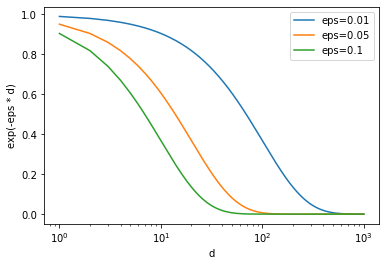

In [9]:
dvals = np.arange(1,1000)
eps = 0.01; plt.semilogx(dvals, np.exp(-eps*dvals), label=f'eps={eps}')
eps = 0.05; plt.semilogx(dvals, np.exp(-eps*dvals), label=f'eps={eps}')
eps = 0.10; plt.semilogx(dvals, np.exp(-eps*dvals), label=f'eps={eps}')
plt.legend(); plt.xlabel('d'); plt.ylabel('exp(-eps * d)')

Comments? Think about $k$-Nearest Neighbours in high dimensions.
In $100$ dimensions, most of the volume (and data? and neighbours?) 
would be in the $5\%$ shell.

### Distance

Denote the vector stemming from the origin to a corner of the
unit hypercube by $\boldsymbol{1}$ and the vector
connecting to the corresponding shrunk corner by
$\boldsymbol{1}-\boldsymbol{1}\epsilon$.

The ends of these vectors are connected by the vector
$\boldsymbol{1}-(\boldsymbol{1}-\boldsymbol{1}\epsilon)=\boldsymbol{1}\epsilon$,
and this has $p$-norm length,

$$
\Vert\boldsymbol{1}\epsilon\Vert_p = \left(
\sum_{n=1}^d\vert\epsilon\vert^p\right)^{1/p} = \epsilon d^{1/p}.
$$ 

This tells us that the thickness of the shell behaves like 
$d^{1/p}$ which grows more and more slowly as $p\to\infty$.

Counterintuitive? High dimensonal space is a bit like that...


### Anonymity and Privacy

This discussion is based on the material here:

 - <https://www.johndcook.com/blog/2018/12/07/simulating-zipcode-sex-birthdate/>
 - <https://techscience.org/a/2015092903/>
 
### How Anonymous is Anonymised Data?

- A university collects answers to personal questions from all of its students.
- Each student's answer has their name, date of birth, gender and department.
- On average a department has 250 students in each year.
- We assume the UK setup where students attend for three years.
- The names are erased: how anonymous are the resulting data?



```
| Name          | D.o.B.   | Gender | Department  |
| ------------- | -------- | ------ | ----------- |
| Ringo Starr   | 26/07/43 |   M    | Music       |
| Al Gebra      | 12/08/05 |   F    | Maths       |
| Sandie Shaw   | 16/02/38 |   F    | Puppetry    |
| Michael Mouse | 17/04/92 |   F    | Computing   |
| Mr Pink       | 4/12/56  |   M    | Criminology |
| L.O. Gear     | 11/9/23  |   F    | Automotive  |
| Donkey Kong   | 23/10/73 |   M    | Video Games |
|     :         |     :    |   :    |     :       |
```

```
| Name          | D.o.B.   | Gender | Department  |
| ------------- | -------- | ------ | ----------- |
|               | 26/07/43 |   M    | Music       |
|               | 12/08/05 |   F    | Maths       |
|               | 16/02/38 |   F    | Puppetry    |
|               | 17/04/92 |   F    | Computing   |
|               | 4/12/56  |   M    | Criminology |
|               | 11/9/23  |   F    | Automotive  |
|               | 23/10/73 |   M    | Video Games |
|               |     :    |   :    |     :       |
```

- The names are erased - can one line identify the person?

- Is DoB, Gender and Department enough information to identify the person?

How anonymous is a dataset like this?

We assume that all students are born within a three year window, and that each
department has 750 students across its three years.

- There are $365\times 3 = 1095$ possible birthdays

- For each there are at least $2$ possible genders

- So, for a given department, there are $d = 1095\times 2 = 2190$
possible entries among $N=750$ students.

>** Can you see why anonymity might not be assured?**

- Think about a line of $N=2190$ empty buckets.

- Now throw $N=750$ balls at random into the buckets.

- Most will stay empty. Some will have just one ball --- the 'loners'.

The proportion of $N$ having just one ball estimates the probabilty
that line of anonymised data occurs just once in the department.

### Computational Simulation - Planning the Code

- We are going to generate a list of $d = 2190$ zeros.

- We'll then generate $N=750$ random integers $z\in\{1,2,\ldots,2190\}$.

- For each $z$ we'll add one to the $z^{\mathrm{th}}$ item in the list,
$d$.

- In the end, the $n^{\mathrm{th}}$ item in the list, $d$, tells us
how many students share that same data.

- We want to find the 'loners' - the buckets with only one item in them.

In [10]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np

d = 365*3*2
N = 750
buckets = np.zeros(d)

for _ in range(N):
    z = randrange(d)
    buckets[z] += 1

Look at how many buckets get more than one item.

(array([539.,  81.,  15.,   1.,   0.,   0.,   0.,   0.]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 8 artists>)

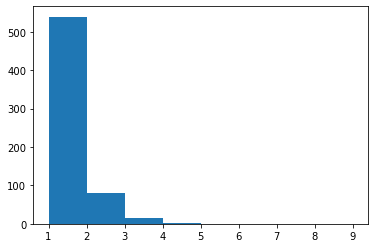

In [12]:
plt.hist(buckets, range(1,10))

Let's estimate the probability.

In [13]:
loners = len(buckets[buckets==1])
print('Probability that anonymous data occurs only once: ', loners/N)
print('Nearly exact probability that anonymous data occurs only once: ', np.exp(-N/d))

print(f'number of buckets = {buckets.shape[0]}')
print(f'number of items in buckets = {sum(buckets)}')
print(f'number of non-empty buckets {len(buckets[buckets!=0])}')

for k in range(5):
  print(f'> number of buckets with {k} items {len(buckets[buckets==k])}')
print(f'> number of buckets with >4 items {len(buckets[buckets>4])}')

Probability that anonymous data occurs only once:  0.7186666666666667
Nearly exact probability that anonymous data occurs only once:  0.7100174346347615
number of buckets = 2190
number of items in buckets = 750.0
number of non-empty buckets 636
> number of buckets with 0 items 1554
> number of buckets with 1 items 539
> number of buckets with 2 items 81
> number of buckets with 3 items 15
> number of buckets with 4 items 1
> number of buckets with >4 items 0


There is about a $70\%$ probability that a student can be identified from
this anonymised data.

As indicated above, a 'near exact' solution is $\exp(-N/d) \approx 71\%$.

My main reference for this was John D Cook:

<www.johndcook.com/blog/2018/12/07/simulating-zipcode-sex-birthdate/>

Which itself references the paper **Only You, Your Doctor, and Many Others May Know**,
by Latanya Sweeney}: <https://techscience.org/a/2015092903/>

>**THNK ABOUT**: as a data scientist you may be consulted on how to curate data.
Bear this experiment in mind. Anonymity isn't as straightforward as it may seem.


#### Homework 

Here is some more code. Have a play around with it.

In [14]:
loners2 = len(buckets[buckets==2])
print('Probability that anonymous data occurs at most twice: ', (loners+2*loners2)/N)

loners3 = len(buckets[buckets==3])
print('Probability that anonymous data occurs at most three times: ', (loners+2*loners2+3*loners3)/N)

loners4 = len(buckets[buckets==4])
print('Probability that anonymous data occurs at most four times: ', (loners+2*loners2+3*loners3+4*loners4)/N)

# a check
print( len(buckets[buckets==1])+2*len(buckets[buckets==2])+3*len(buckets[buckets==3])+4*len(buckets[buckets==4]) )

Probability that anonymous data occurs at most twice:  0.9346666666666666
Probability that anonymous data occurs at most three times:  0.9946666666666667
Probability that anonymous data occurs at most four times:  1.0
750


### Ethics

The discussion above touches on the more general topic of 
ethics and the responsible use of data, and AI.

There's a free-to-view MOOC here if you're interested in this:

<https://ethics-of-ai.mooc.fi/chapter-1/1-a-guide-to-ai-ethics>

It's a big topic. 

We already explored an issue around **fairness** with the example
based on the discussion in Chapter 12 of our reference book [MLFCES]:

- MLFCES: Machine Learning: A First Course for Engineers and Scientists,
by Andreas Lindholm, Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön.
Cambridge University Press. <http://smlbook.org>

Other topics touched on there include a discussion of **misleading claims
about performance** (in five years time we'll be able to ...) and 
**explainability**.

### Explainable AI

This is regarded as a very serious topic. AI's may soon (already are?) make lots of
important decisions (life or death or financial or societal or ...).

Some of those decisions may be poor. How can
we make judgements about whether the mistake is justified or not?

A self-driving car may have to choose between hitting a child that ran into the
road, or driving its passengers off the road into the neightbouring sea.

How can we prepare an AI for that? How can we probe its decision after the fact?

It may not matter if your social media app wrongly face-tagged your best friend
as your sister, but what about in financial and medical scenarios? What about
in high-hazard zones? 

**Would you travel in a self-flying aeroplane?**

A rather advanced treatment can be found in [IML]

**Interpretable Machine Learning:**
**A Guide for Making Black Box Models Explainable**, by
Christoph Molnar,

and available here: <https://christophm.github.io/interpretable-ml-book/>.

We can't even begin to engage with this material in any depth, but think
about what you have learned in the last couple of weeks...

You can completely explain a linear regression model. Typically, you provide
the data, solve the normal equations, thus minimising cost, and arrive at
a polynomial you can plot.

Consider your MNIST classifying neural network. When it mis-classifies can you
even begin to explain why? Which weight(s) or bias(es) caused the error? Why
they have that (wrong?) value?

### Responsible AI

Chapter 13 of **A Hands-On Introduction to Machine Learning, by Chirag Shah**

<https://www.cambridge.org/highereducation/books/a-hands-on-introduction-to-machine-learning/3E57313A963BF7AF5C6330EB88ADAB2E#overview>

also has some excellent content on these ideas. Unfortunately this book is not 
free like the main references that we have been using. The kind of
topics to think about are

- dataset bias: when an ML tool is trained on a dataset then the 
AI that tool demonstrates is likely to inherit flaws in the data set.

This is obvious if the data is wrong because the training will be too.

More serious though is that many datasets are biased. White males may
for example dominate the dataset. The ML tool may then learn to be 
racist and mysogynistic.

This isn't just hypothetical - there is a well known case related to
Amazon's use of AI in hiring:
<https://www.reuters.com/article/us-amazon-com-jobs-automation-insight-idUSKCN1MK08G>

Chapter 1.5 of [UDL], 'Ethics', is freely available and gives a very 
useful summary. It touches on **Bias and Fairness** and **Explainability**
and also on:

- **Weaponizing AI:** humans seem not to be able to resist creating more and
more devesatating weapons. What about an armed AI drone that knows no fear?

- **Concentrating power:** do the rich nations reap all the reards of AI without
bringing the rest along with them? Is that moral? Is it de-stabilising?

- **Existential risk:** will we keep control?

Stuart Russell in **Human Compatible** discusses a
coffee making robot with a cost function based on keeping
humans happy with coffee deliveries to their desk.

It learns that **it can't make the coffee if I'm dead**, and so
it must stay alive to keep its cost function optimized. The next step is to learn
that it **must not** allow itself to be switched off... That requires defence...


Russell's book is not free, but well worth it:
<https://people.eecs.berkeley.edu/~russell/hc.html>

### Review

For the last time, we covered *just enough*, to make *progress at pace*.
We looked at

- XE, SoftMax and backprop
- Privacy
- Ethics, explainability and responsible AI

Again, and as usual, there is much much more. There always is... 

For example: bagging, boosting, dropout and regularization... - just a few.

**Thanks for taking this journey with me.**

**Best Wishes and Good Luck.**


## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides 15_further.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [7]:
%%bash
NBROOTNAME=15_further
OUTPUTTING=0

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

Not Generating html, pdf and py output versions
